<a href="https://colab.research.google.com/github/0204hyoj/data-visualization/blob/main/cctv_%EC%9D%B8%EA%B5%AC%EC%88%98_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# basic 
import time
import random
import math

#data analytics
import numpy as np
import pandas as pd

#Math
import scipy as sp
import statsmodels.api as sm

#web crawling
import requests
from bs4 import BeautifulSoup

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [ ]:
# 한글 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

CCTV

In [ ]:
CCTV = pd.read_csv('/content/서울시CCTV설치운영현황(자치구)_년도별_211231기준 (1).csv', skiprows = [0,2],encoding='euc-kr', thousands =',')

# 구분 -> 자치구
CCTV.rename(columns = {CCTV.columns[0] : '자치구'}, inplace = True)
# Nan 값 -> 0으로
CCTV = CCTV.fillna(0)
# 2012년이전->2016년 열 삭제
CCTV = CCTV.drop(columns=['2012년 이전','2012년','2013년','2014년','2015년','2016년'])

CCTV.head()

,자치구,총계,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,261,85,9,200,0
1,중 구,2447,372,386,155,361,403
2,용산구,2611,351,125,307,617,228
3,성동구,3829,967,415,490,472,283
4,광진구,3211,675,465,712,175,655


주민등록인구

In [ ]:
Seoul = pd.read_excel('/content/주민등록인구_20221129214606.xlsx')
Seoul = pd.read_excel('/content/주민등록인구_20221129214606.xlsx',
                      header =1,
                      usecols = 'B,C,D,E')
Seoul.rename(columns ={Seoul.columns[0] : '자치구',
                       Seoul.columns[1] : '인구수',
                       Seoul.columns[2] : '한국인',
                       Seoul.columns[3] : '외국인'}, inplace = True
                       )
Seoul.head()

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구,인구수,한국인,외국인
0,종로구,153789.0,144683.0,9106.0
1,중구,131787.0,122499.0,9288.0
2,용산구,237285.0,222953.0,14332.0
3,성동구,292672.0,285990.0,6682.0
4,광진구,352627.0,339996.0,12631.0


5대 범죄

In [ ]:
crime = pd.read_excel('5대+범죄+발생현황(2017-2021, 발생.검거 합계).xlsx')
crime = pd.read_excel('5대+범죄+발생현황(2017-2021, 발생.검거 합계).xlsx',
                      header = 2,
                      usecols = 'B,C,D,E,F,G,H,I,J,K,L,M,N')
crime.rename(columns = {crime.columns[0] : '자치구',
                        crime.columns[1] : '2017년 발생',
                        crime.columns[2] : '2017년 검거',
                        crime.columns[3] : '2018년 발생',
                        crime.columns[4] : '2018년 검거',
                        crime.columns[5] : '2019년 발생',
                        crime.columns[6] : '2019년 검거',
                        crime.columns[7] : '2020년 발생',
                        crime.columns[8] : '2020년 검거', 
                        crime.columns[9] : '2021년 발생', 
                        crime.columns[10] : '2021년 검거'}, inplace = True)
crime = crime.drop([0],axis = 0)
crime.head()

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.8/dist-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


,자치구,2017년 발생,2017년 검거,2018년 발생,2018년 검거,2019년 발생,2019년 검거,2020년 발생,2020년 검거,2021년 발생,2021년 검거
1,종로구,4057.0,4437.0,3690.0,3913.0,3846.0,4117.0,3102.0,3343.0,2712.0,2755.0
2,중구,4184.0,2851.0,4030.0,2679.0,4327.0,2804.0,3411.0,2323.0,2861.0,2072.0
3,용산구,4060.0,2936.0,3411.0,2543.0,3313.0,2611.0,2969.0,2056.0,2381.0,1659.0
4,성동구,2767.0,2031.0,2457.0,1787.0,2512.0,1838.0,2362.0,1774.0,2112.0,1510.0
5,광진구,4646.0,3289.0,3915.0,2789.0,4011.0,2816.0,3601.0,2511.0,3087.0,2202.0


인구수 대비 CCTV 개수

In [ ]:
CCTV_total = np.array(CCTV['총계'])
Seoul_total = np.array(Seoul['인구수'])
place = np.array(crime['자치구'])

CS = np.trunc((CCTV_total / Seoul_total) * 1000)

CS_sr = pd.Series(CS, name = "인구수 대비 CCTV개수")
CS_sr.index = place

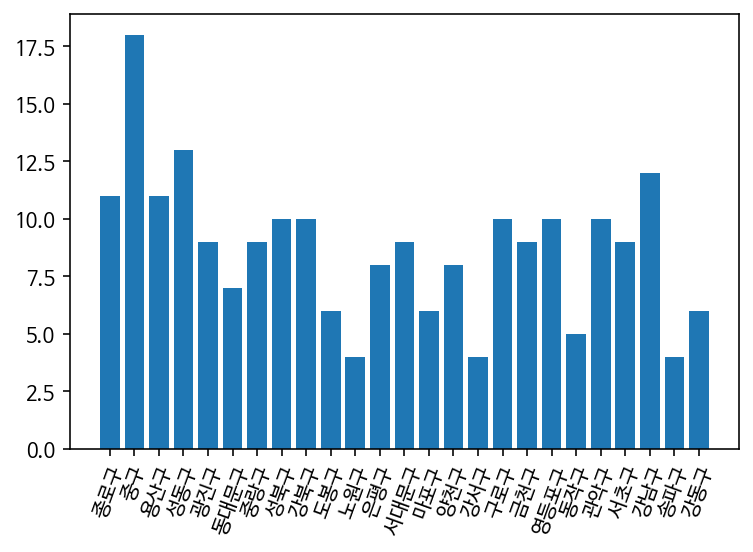

In [ ]:
plt.bar(CS_sr.index, CS_sr)
plt.xticks(rotation=70)
plt.show()

In [ ]:
#인구수 대비 CCTV개수가 적은 5개의 지역
CS_sr_small = CS_sr.nsmallest(5)
print(CS_sr_small)

노원구    4.0
강서구    4.0
송파구    4.0
동작구    5.0
도봉구    6.0
Name: 인구수 대비 CCTV개수, dtype: float64


CCTV개수와 범죄 발생률의 연관관계

In [ ]:
CS_sr_larg = CS_sr.nlargest(5)
print(CS_sr_larg)

중구     18.0
성동구    13.0
강남구    12.0
종로구    11.0
용산구    11.0
Name: 인구수 대비 CCTV개수, dtype: float64


In [ ]:
place = np.array(crime['자치구'])
crime_171 = np.array(crime['2017년 발생'])
crime_181 = np.array(crime['2018년 발생'])
crime_191 = np.array(crime['2019년 발생'])
crime_201 = np.array(crime['2020년 발생'])
crime_211 = np.array(crime['2021년 발생'])

crime_55 = np.stack((place, crime_171, crime_181, crime_191, crime_201, crime_211), axis=0)
crime55 = crime_55.T
print(crime55)

[['종로구' 4057.0 3690.0 3846.0 3102.0 2712.0]
 ['중구' 4184.0 4030.0 4327.0 3411.0 2861.0]
 ['용산구' 4060.0 3411.0 3313.0 2969.0 2381.0]
 ['성동구' 2767.0 2457.0 2512.0 2362.0 2112.0]
 ['광진구' 4646.0 3915.0 4011.0 3601.0 3087.0]
 ['동대문구' 3975.0 3680.0 3692.0 3401.0 2959.0]
 ['중랑구' 4571.0 4288.0 4268.0 3726.0 3210.0]
 ['성북구' 3434.0 3042.0 2877.0 2567.0 2411.0]
 ['강북구' 3393.0 3437.0 3838.0 2770.0 2301.0]
 ['도봉구' 1999.0 2249.0 2110.0 2179.0 1860.0]
 ['노원구' 4209.0 4007.0 4153.0 3743.0 3425.0]
 ['은평구' 3883.0 3590.0 3880.0 3390.0 3244.0]
 ['서대문구' 3113.0 2802.0 2943.0 2533.0 2278.0]
 ['마포구' 5278.0 5172.0 4842.0 3688.0 3540.0]
 ['양천구' 3882.0 3515.0 3214.0 3216.0 3015.0]
 ['강서구' 5135.0 4629.0 4924.0 4415.0 3896.0]
 ['구로구' 4895.0 4810.0 4707.0 4175.0 3486.0]
 ['금천구' 3265.0 3293.0 3105.0 2598.0 2439.0]
 ['영등포구' 5969.0 5840.0 5820.0 5217.0 4179.0]
 ['동작구' 3330.0 3100.0 3400.0 3200.0 2631.0]
 ['관악구' 5525.0 5026.0 5328.0 5261.0 4444.0]
 ['서초구' 4708.0 4726.0 5542.0 4601.0 3656.0]
 ['강남구' 7720.0 7513.0 7304.0 7

In [ ]:
#중구
larg_place1 = crime55[1,1:6]
print(larg_place1)
#성동구
larg_place2 = crime55[3,1:6]
print(larg_place2)
#강남구
larg_place3 = crime55[22,1:6]
print(larg_place3)
#종로구
larg_place4 = crime55[0,1:6]
print(larg_place4)
#용산구
larg_place5 = crime55[2,1:6]
print(larg_place5)

[4184.0 4030.0 4327.0 3411.0 2861.0]
[2767.0 2457.0 2512.0 2362.0 2112.0]
[7720.0 7513.0 7304.0 7356.0 6146.0]
[4057.0 3690.0 3846.0 3102.0 2712.0]
[4060.0 3411.0 3313.0 2969.0 2381.0]


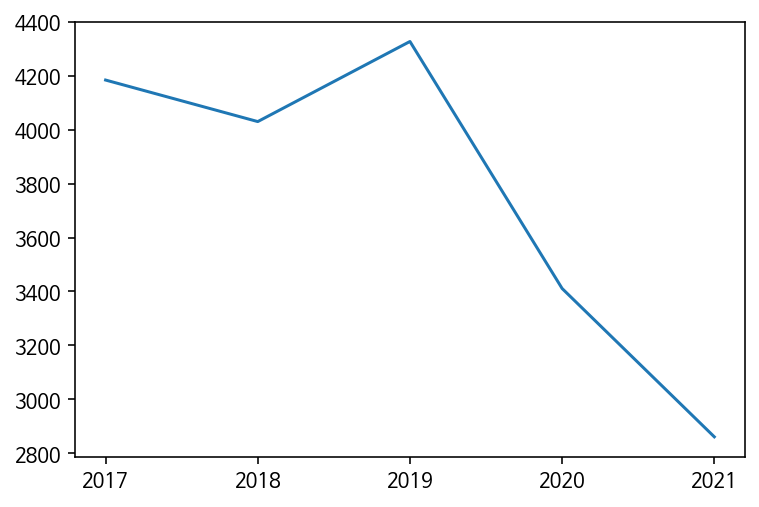

In [ ]:
#중구
p1_sr = pd.Series(larg_place1, name = "발생률 감소")
p1_sr.index = ['2017', '2018', '2019', '2020', '2021']

plt.plot(p1_sr.index, p1_sr)
plt.show()

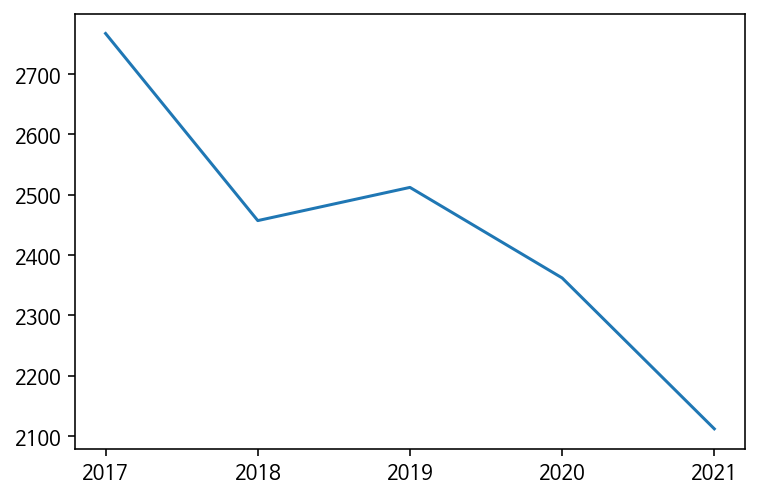

In [ ]:
#성동구
p2_sr = pd.Series(larg_place2, name = "발생률 감소")
p2_sr.index = ['2017', '2018', '2019', '2020', '2021']

plt.plot(p2_sr.index, p2_sr)
plt.show()

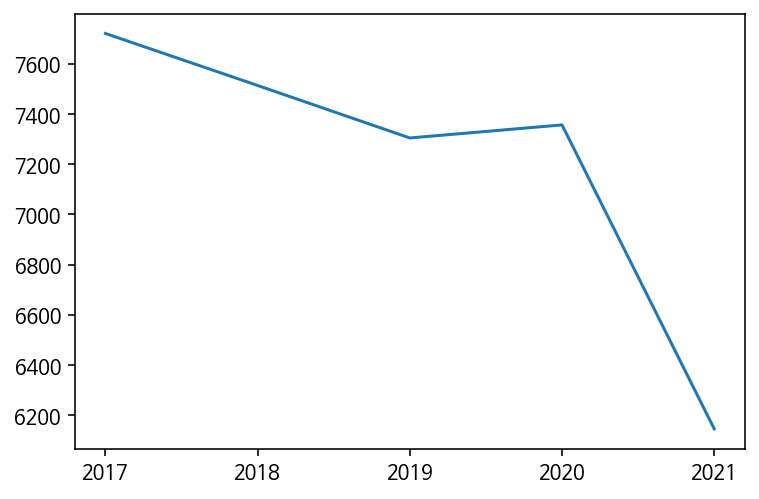

In [ ]:
#강남구
p3_sr = pd.Series(larg_place3, name = "발생률 감소")
p3_sr.index = ['2017', '2018', '2019', '2020', '2021']

plt.plot(p3_sr.index, p3_sr)
plt.show()

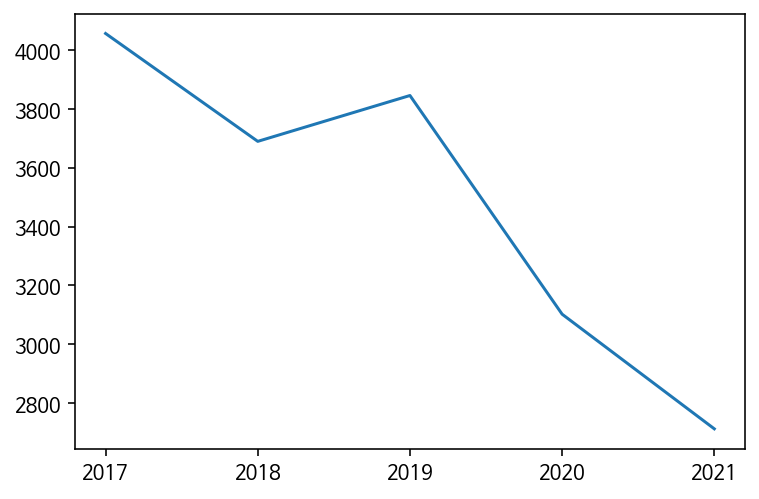

In [ ]:
#종로구
p4_sr = pd.Series(larg_place4, name = "발생률 감소")
p4_sr.index = ['2017', '2018', '2019', '2020', '2021']

plt.plot(p4_sr.index, p4_sr)
plt.show()

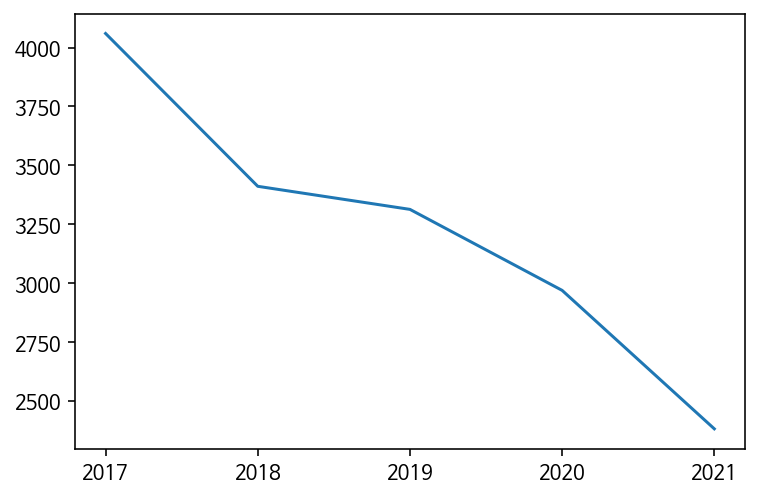

In [ ]:
#용산구
p5_sr = pd.Series(larg_place5, name = "발생률 감소")
p5_sr.index = ['2017', '2018', '2019', '2020', '2021']

plt.plot(p5_sr.index, p5_sr)
plt.show()